# Install Packages

In [ ]:
### install mtcnn if not already installed ###
# !pip install mtcnn

     |████████████████████████████████| 2.3 MB 3.6 MB/s 


### Install this package if not already installed as we require this to get target faces

# Check GPU and Runtime

### To check if you are using high ram and GPU (Colab Pro) No need if running on local machine -- PS local machine might run out of RAM

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 15 06:38:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Mount Drive

#### Mount Drive to get dataset, embeding outputs etc. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Split

### This code can be run for train test split images however, takes some time to RUN, would recommend to run on local machine. As this is not the scope of this project we have provided the output of this step which can be directly downloaded: https://drive.google.com/drive/folders/1CtLdASAT8FpboPUgcW-PXiFcO2hxKA5U?usp=sharing. Download the folder and place '0001' folder under reverse-visual-search folder in your drive.

### Create a Folder LFW under rever-visual-search folder with input images, dataset can be downloaded here: http://vis-www.cs.umass.edu/lfw/lfw.tgz

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# labels = np.array(list(zip(os.listdir('LFW'), range(len(os.listdir('LFW'))))))
# labels_dict = {labels[i][0]: int(labels[i][1]) for i in range(len(labels))}
# labels_dict_save = {int(labels[i][1]): labels[i][0] for i in range(len(labels))}

In [ ]:
# X = list()
# y = list()
# for name in labels[:, 0]:
#     path = os.listdir(os.path.join('LFW', name))
#     X.extend(path)
#     for image in path:
#         y.append(
#             [labels_dict[image.split('0')[0][: -1]], image.split('.')[0].split('_')[-1]]
#         )

In [ ]:
# joined_lists = list(zip(X, y))
# random.shuffle(joined_lists) # Shuffle "joined_lists" in place
# X_shuffle, y_shuffle = zip(*joined_lists) # Undo joining
# X_shuffle = np.array(X_shuffle)
# y_shuffle = np.array(y_shuffle)

In [ ]:
# split_index = int(len(X_shuffle) * 0.8)

In [ ]:
# X_train, X_test = X_shuffle[: split_index], X_shuffle[split_index: ]
# y_train, y_test = y_shuffle[: split_index], y_shuffle[split_index: ]

In [ ]:
# pd.DataFrame(data={"Name": labels_dict_save.keys(), "Label": labels_dict_save.values()}).to_csv(os.path.join("0001", "labels.csv"))

In [ ]:
# y_train[:, 0]

In [ ]:
# pd.DataFrame(data={"Name": X_train, "Label": y_train[:, 0], "image": y_train[:, 1]}).to_csv(os.path.join("0001", "train.csv"))
# pd.DataFrame(data={"Name": X_test, "Label": y_test[:, 0], "image": y_test[:, 1]}).to_csv(os.path.join("0001","test.csv"))

# Dataset Read

### In this step we read the dataset we got from last step and prepare for MTCNN face detection, instead of reading the dataset from scratch you can run the line ""RUN HERE"" to skip data reading process. 

In [ ]:
from matplotlib import image

In [ ]:
train = pd.read_csv(os.path.join("/content/drive/My Drive/reverse-visual-search/0001", "train.csv"), index_col=0)
test = pd.read_csv(os.path.join("/content/drive/My Drive/reverse-visual-search/0001", "test.csv"),  index_col=0)
labels = pd.read_csv(os.path.join("/content/drive/My Drive/reverse-visual-search/0001", "labels.csv"), index_col=0)

In [ ]:
# X_train = list()
# for name in train["Name"]:
#     directory = name.split("0")[0][: -1]
#     X_train.append(image.imread(os.path.join("/content/drive/My Drive/reverse-visual-search/LFW", directory, name)))
# X_train = np.array(X_train)

In [ ]:
# X_train.shape

In [ ]:
# X_test = list()
# for name in test["Name"]:
#     directory = name.split("0")[0][: -1]
#     X_test.append(image.imread(os.path.join("/content/drive/My Drive/reverse-visual-search/LFW", directory, name)))
# X_test = np.array(X_test)

In [ ]:
# X_test.shape

In [ ]:
y_train = np.array(train["Label"])
y_test = np.array(test["Label"])

In [ ]:
y_train.shape

(10586,)

In [ ]:
y_test.shape

(2647,)

In [ ]:
train_images = np.array(train["image"])
test_images = np.array(test["image"])

In [ ]:
train_images.shape

(10586,)

In [ ]:
test_images.shape

(2647,)

In [ ]:
# np.save(os.path.join("0001",'X_train'), X_train)
# np.save(os.path.join("0001",'X_test'), X_test)

In [ ]:
###### ""RUN HERE"" ######
X_train = np.load(os.path.join("/content/drive/My Drive/reverse-visual-search/0001",'X_train.npy'))
X_test = np.load(os.path.join("/content/drive/My Drive/reverse-visual-search/0001",'X_test.npy'))

In [ ]:
X_train.shape

(10586, 250, 250, 3)

In [ ]:
X_test.shape

(2647, 250, 250, 3)

# Face Detector MTCNN

### In this step we extract the target faces from input images using MTCNN, if you want to skip this step. You can directly run from '''RUN HERE''' as we have provided output in 0001 folder which can be downloaded above,

In [ ]:
from mtcnn.mtcnn import MTCNN
from PIL import Image
import time

def extract_face(detector, pixels, required_size=(250, 250)):
    # create the detector, using default weights
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [ ]:
train_faces = list()

detector = MTCNN()
count = 0
for train in X_train:
    start = time.time()
    face = extract_face(detector, train)
    train_faces.append(face)
    end = time.time()
    print(f'Time Spent {end - start} Count{count}')
    count += 1

train_faces = np.array(train_faces)

In [ ]:
test_faces = list()

count = 1

for test in X_test:
    start = time.time()
    face = extract_face(detector, test)
    test_faces.append(face)
    end = time.time()
    print(f'Time Spent {end - start} Count{count}')
    count += 1

test_faces = np.array(test_faces)

In [ ]:
# train_faces.shape

In [ ]:
# test_faces.shape

In [ ]:
# np.save(os.path.join("/content/drive/My Drive/reverse-visual-search/0001",'train_faces'), train_faces)
# np.save(os.path.join("/content/drive/My Drive/reverse-visual-search/0001",'test_faces'), test_faces)

In [ ]:
###### ""RUN HERE"" ######
X_train = np.load(os.path.join("/content/drive/My Drive/reverse-visual-search/0001",'train_faces.npy'))
X_test = np.load(os.path.join("/content/drive/My Drive/reverse-visual-search/0001",'test_faces.npy'))

In [ ]:
X_train.shape

(10586, 250, 250, 3)

In [ ]:
X_test.shape

(2647, 250, 250, 3)

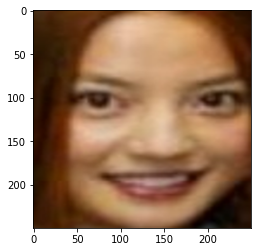

In [ ]:
plt.imshow(X_train[0])

# Resnet 50

### In this step we will extract the embeddings from RESNET 50. Since Resnet 50 is available from tensorflow we dont need to download anything here seperately. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
resnet_model = ResNet50(weights='imagenet', input_shape=(250, 250, 3), include_top=False, pooling='avg')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# resnet_model.save('models/', save_format='tf')

In [ ]:
for layer in resnet_model.layers[:]:
    layer.trainable = False

In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# process the input for RESNET 50, this might result in out of RAM error. If this happens you can skip
# this step and directly get embeddings in the next step. 
X_train_processed = preprocess_input(X_train)
X_test_processed = preprocess_input(X_test)

In [ ]:
## Run this code if you have not pre processed input ##
## CODE ##

# X_train_features = list()

# count = 1
# for train in X_train:
#   # print(train[None, :, :, :].shape)
#   X_train_features.append(resnet_model.predict(train[None, :, :, :])[0])
#   print(f'Predicted: {count}')
#   count += 1

# X_train_features = np.array(X_train_features)

In [ ]:
## Run this code if you have pre processed input ##
## CODE ##

X_train_features = list()

count = 1
for train in X_train_processed:
  # print(train[None, :, :, :].shape)
  X_train_features.append(resnet_model.predict(train[None, :, :, :])[0])
  print(f'Predicted: {count}')
  count += 1

X_train_features = np.array(X_train_features)

Streaming output truncated to the last 5000 lines.
Predicted: 5587
Predicted: 5588
Predicted: 5589
Predicted: 5590
Predicted: 5591
Predicted: 5592
Predicted: 5593
Predicted: 5594
Predicted: 5595
Predicted: 5596
Predicted: 5597
Predicted: 5598
Predicted: 5599
Predicted: 5600
Predicted: 5601
Predicted: 5602
Predicted: 5603
Predicted: 5604
Predicted: 5605
Predicted: 5606
Predicted: 5607
Predicted: 5608
Predicted: 5609
Predicted: 5610
Predicted: 5611
Predicted: 5612
Predicted: 5613
Predicted: 5614
Predicted: 5615
Predicted: 5616
Predicted: 5617
Predicted: 5618
Predicted: 5619
Predicted: 5620
Predicted: 5621
Predicted: 5622
Predicted: 5623
Predicted: 5624
Predicted: 5625
Predicted: 5626
Predicted: 5627
Predicted: 5628
Predicted: 5629
Predicted: 5630
Predicted: 5631
Predicted: 5632
Predicted: 5633
Predicted: 5634
Predicted: 5635
Predicted: 5636
Predicted: 5637
Predicted: 5638
Predicted: 5639
Predicted: 5640
Predicted: 5641
Predicted: 5642
Predicted: 5643
Predicted: 5644
Predicted: 5645
Predi

In [ ]:
X_train_features.shape

(10586, 2048)

In [ ]:
## Run this code if you have not pre processed input ##
## CODE ##

# X_test_features = list()

# count = 1
# for test in X_test:
#   X_test_features.append(resnet_model.predict(test[None, :, :, :])[0])
#   print(f'Predicted: {count}')
#   count += 1

# X_test_features = np.array(X_test_features)

In [ ]:
## Run this code if you have pre processed input ##
## CODE ##

X_test_features = list()

count = 1
for test in X_test_processed:
  X_test_features.append(resnet_model.predict(test[None, :, :, :])[0])
  print(f'Predicted: {count}')
  count += 1

X_test_features = np.array(X_test_features)

Predicted: 1
Predicted: 2
Predicted: 3
Predicted: 4
Predicted: 5
Predicted: 6
Predicted: 7
Predicted: 8
Predicted: 9
Predicted: 10
Predicted: 11
Predicted: 12
Predicted: 13
Predicted: 14
Predicted: 15
Predicted: 16
Predicted: 17
Predicted: 18
Predicted: 19
Predicted: 20
Predicted: 21
Predicted: 22
Predicted: 23
Predicted: 24
Predicted: 25
Predicted: 26
Predicted: 27
Predicted: 28
Predicted: 29
Predicted: 30
Predicted: 31
Predicted: 32
Predicted: 33
Predicted: 34
Predicted: 35
Predicted: 36
Predicted: 37
Predicted: 38
Predicted: 39
Predicted: 40
Predicted: 41
Predicted: 42
Predicted: 43
Predicted: 44
Predicted: 45
Predicted: 46
Predicted: 47
Predicted: 48
Predicted: 49
Predicted: 50
Predicted: 51
Predicted: 52
Predicted: 53
Predicted: 54
Predicted: 55
Predicted: 56
Predicted: 57
Predicted: 58
Predicted: 59
Predicted: 60
Predicted: 61
Predicted: 62
Predicted: 63
Predicted: 64
Predicted: 65
Predicted: 66
Predicted: 67
Predicted: 68
Predicted: 69
Predicted: 70
Predicted: 71
Predicted: 72
P

In [ ]:
X_test_features.shape

(2647, 2048)

In [ ]:
## save your embeddings OR you can load from 0001 foler ##
np.savetxt(os.path.join("/content/drive/My Drive/reverse-visual-search/0001", "X_train_features.txt"), X_train_features)
np.savetxt(os.path.join("/content/drive/My Drive/reverse-visual-search/0001", "X_test_features.txt"), X_test_features)

In [ ]:
## OR you can load from 0001 foler ##
X_train_features = np.loadtxt(os.path.join("/content/drive/My Drive/reverse-visual-search/0001",'X_train_features.txt'))
X_test_features = np.loadtxt(os.path.join("/content/drive/My Drive/reverse-visual-search/0001",'X_test_features.txt'))

# KNN

### In this step we will fit our embeddings on KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.fit(X_train_features, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predictions = neigh.predict(X_test_features)

# Accuracy

In [ ]:
accuracy_score(y_test, y_predictions) # Accuracy is 12% we will improve this in other methods

0.12655836796373252

### Output can be seen here: https://drive.google.com/drive/folders/1lei2xt0TTgpJPy7agudtLli5m1QcvWJP?usp=sharing